## Método de Ondas Planas

Programa para calcular la estructura de bandas de un cristal
Fotónico 1D por medio del método de ondas planas PWE  
Referencia: Photonics Crystals, Physics and practical modeling  
Igor A. Sukhoivanov and Igor V. Guryev

In [9]:
import numpy as np
import matplotlib.pyplot as plt

l1 = 0.2e-6
l2 = 0.8e-6

eps1 = 1
eps2 = 9

a = l1+l2
numG = 50

G  = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
G1 = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
chi = np.zeros((len(G),len(G1)),dtype = 'complex_')

for i in range(len(G)):
    for J in range(len(G1)):
        if(G[i] - G1[J]) == 0:
            chi[i,J] = 1/(l1+l2) * (1/eps1 * l1 + 1/eps2*l2)
        else:
            chi[i,J] = 1j /(l1+l2)/(G[i]-G1[J]) * (1/eps1 * np.exp(-1j * (G[i]-G1[J]) * l1) - 1) + 1/eps2 * (np.exp(-1j * (G[i]-G1[J]) * (l1+l2)) - np.exp(-1j * (G[i]-G1[J])*l1))


In [2]:
print(chi)
print(chi.shape)

[[ 2.88888889e-01+0.00000000e+00j  2.28141235e-01+4.30041468e-03j
   2.47776352e-01+7.86475259e-02j ...  2.01966310e-01-6.23412869e-02j
   2.00047307e-01+6.82473704e-02j  7.52469466e-02+1.06783788e-01j]
 [ 2.28141235e-01-4.30041468e-03j  2.88888889e-01+0.00000000e+00j
   2.28141235e-01+4.30041468e-03j ...  7.83526119e-02-1.04527390e-01j
   2.01966310e-01-6.23412869e-02j  2.00047307e-01+6.82473704e-02j]
 [ 2.47776352e-01-7.86475259e-02j  2.28141235e-01-4.30041468e-03j
   2.88888889e-01+0.00000000e+00j ... -5.19661050e-16-1.42597856e-13j
   7.83526119e-02-1.04527390e-01j  2.01966310e-01-6.23412869e-02j]
 ...
 [ 2.01966310e-01+6.23412869e-02j  7.83526119e-02+1.04527390e-01j
  -5.19661050e-16+1.42597856e-13j ...  2.88888889e-01+0.00000000e+00j
   2.28141235e-01+4.30041468e-03j  2.47776352e-01+7.86475259e-02j]
 [ 2.00047307e-01-6.82473704e-02j  2.01966310e-01+6.23412869e-02j
   7.83526119e-02+1.04527390e-01j ...  2.28141235e-01-4.30041468e-03j
   2.88888889e-01+0.00000000e+00j  2.28141235e-

In [3]:
M = np.zeros((len(G),len(G1)),dtype = 'complex_')
ks = np.linspace(-2*np.pi/a, 2*np.pi/a,100)
Ks = list()
dispe = list()


In [4]:
for k in range(len(ks)):
    for i in range(len(G)):
        for j in range(len(G1)):
            M[j,i] = chi[j,i] * (ks[k] + G1[j]) * (ks[k] + G[i])
    V = np.linalg.eig(M)[0]
    dispe.append(np.sqrt(np.sort(np.abs(V))) * a/2/np.pi)
    Ks.append(ks[k] * a/np.pi)




In [5]:
print(dispe[0])

[4.15117670e-08 3.05579077e-01 3.70520650e-01 6.38331024e-01
 7.40172946e-01 9.91373700e-01 1.10770271e+00 1.35420833e+00
 1.47073988e+00 1.72168014e+00 1.82403142e+00 2.09142459e+00
 2.15648634e+00 2.46019802e+00 2.46220863e+00 2.76425253e+00
 2.83313274e+00 3.09721143e+00 3.20341916e+00 3.45099009e+00
 3.57187435e+00 3.81459060e+00 3.93624132e+00 4.18283484e+00
 4.29126337e+00 4.55340683e+00 4.62450234e+00 4.92359511e+00
 4.92532635e+00 5.22218361e+00 5.29719197e+00 5.55459049e+00
 5.66889091e+00 5.90974131e+00 6.03921986e+00 6.27490297e+00
 6.40622856e+00 6.64467723e+00 6.76506806e+00 7.01679824e+00
 7.10203546e+00 7.38972190e+00 7.39591415e+00 7.68198669e+00
 7.76420881e+00 8.01266115e+00 8.13816024e+00 8.36995440e+00
 8.51135772e+00 8.73761010e+00 8.88230402e+00 9.10982181e+00
 9.24705454e+00 9.48440398e+00 9.59209154e+00 9.86018440e+00
 9.88167205e+00 1.01491001e+01 1.02374319e+01 1.04785246e+01
 1.06148277e+01 1.08405881e+01 1.09923204e+01 1.12135253e+01
 1.13690322e+01 1.159133

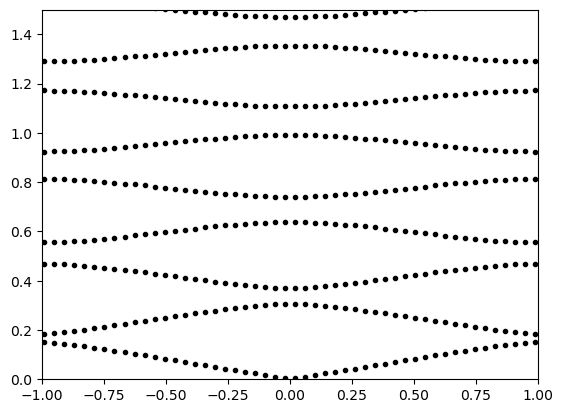

In [6]:
import matplotlib.pyplot as plt

for i in range(len(Ks)):
    plt.plot([Ks[i]] * len(dispe[i]), dispe[i],'.',color='black')
    plt.xlim([-1,1])
    plt.ylim([0,1.5])

## Campo Eléctrico

In [7]:
def Field(x):
    global a, numG, k, Vs, in1
    H = 0
    countt = 0
    for G in np.arange(-numG * 2 * np.pi / a, numG * 2 * np.pi / a + 0.0001, 2 * np.pi / a):
        countt += 1
        H += Vs[countt - 1, in1] * np.exp(1j * (k + G) * x)
    return H

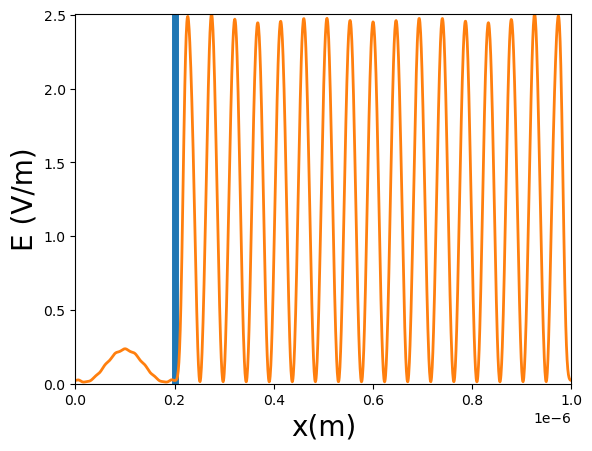

In [10]:
from scipy.linalg import eigh

def calculate_field(x, a, numG, k, Vs, in1):
    H = 0
    countt = 0
    for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        countt += 1
        H += Vs[countt,in1]*np.exp(1j*(k+G)*x)
    return H

# Definir tus variables aquí
k = np.pi/(15*a)
in1 = 20

countG1 = 1
countG = 1
M1 = np.zeros((2*numG+1, 2*numG+1), dtype=complex)

for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
    for G1 in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        M1[countG1-1,countG-1] = chi[countG1-1,countG-1]*(k+G1)*(k+G)
        countG += 1
    countG1 += 1
    countG = 1

countG1 = 1

eigvals, eigvecs = eigh(M1)
ind = np.argsort(eigvals)
Ds = eigvals[ind]
Vs = eigvecs[:,ind]

freq = np.sqrt(abs(Ds[in1-1]))*a/2/np.pi

div = 15
div1 = 1500
x = np.linspace(0, a, div1+1)
FieldE = np.abs(calculate_field(x, a, numG, k, Vs, in1))**2

alt = np.max(np.abs(FieldE))
x1 = np.linspace(0, alt, div+1)
y1 = l1*np.ones(div+1)

plt.figure(2)
plt.plot(y1, x1, linewidth=5)
plt.plot(x, FieldE, linewidth=2)
plt.xlabel('x(m)', fontsize=20)
plt.ylabel('E (V/m)', fontsize=20)
plt.ylim([0, alt])
plt.xlim([0, a])
plt.show()
